In [1]:
import matplotlib as plt
#matplotlib.use('TkAgg')
from pylab import *
import networkx as nx
import random as rd

def initialize():
    g = nx.karate_club_graph()
    g.pos = nx.spring_layout(g)
    for i in g.nodes:
        g.nodes[i]['state'] = 1 if random() < .5 else 0
        
    return g

def observe(g):
    cla()
    nx.draw(g, vmin = 0, vmax = 1,
            node_color = [g.nodes[i]['state'] for i in g.nodes],
            pos = g.pos)

def update(g):
    listener = rd.choice(list(g.nodes))
    speaker = rd.choice(list(g.neighbors(listener)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    return g

def update_rev(g):
    speaker = rd.choice(list(g.nodes))
    listener = rd.choice(list(g.neighbors(speaker)))
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    return g

def update_edge(g):
    #Pick a random edge and make it to a list so it can be shuffles
    edge = list(rd.choice(list(g.edges)))
    
    #shuffle the nodes in place
    rd.shuffle(edge)
    
    #assign node to listner and speaker
    listener = edge[0]
    speaker = edge[1]
    
    #update the listner to be the same as peaker
    g.nodes[listener]['state'] = g.nodes[speaker]['state']
    
    return g
    
def check_consens(g):
    #function that checks if the network has reached consensus
    #sum of all the states
    sum_states = sum(list(dict(g.nodes(data = "state")).values()))
    
    #If the network is unanimous (i.e. all 0 or all 1)
    if sum_states == 0 or sum_states == len(g.nodes):
        return True
    else:
        return False

In [2]:
def run_experiment(update_func = update, trails = 1000):
    
    #list to hold the data
    result = []
    
    #run each trail
    for i in range(trails):
        
        #Initialize the graph
        g = initialize()
        
        #count for the number of iteration to consensus
        count = 0
        
        #If not consensus
        while not check_consens(g):
            
            #update the graph
            g = update_func(g)
            
            #add to count
            count += 1
            
        #apppend count to concensus
        result.append(count)
    
    return result

In [3]:
data1 = run_experiment()
data2 = run_experiment(update_func = update_rev)
data3 = run_experiment(update_func = update_edge)

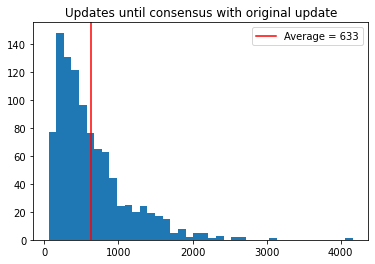

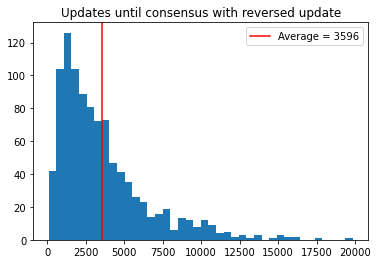

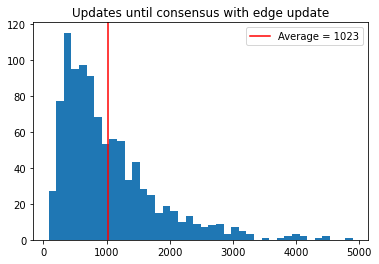

In [4]:
plt.hist(data1, bins = 40)
plt.axvline(np.mean(np.array(data1)), color = "red", label = f"Average = {np.mean(np.array(data1)):.0f}")
plt.legend()
plt.title("Updates until consensus with original update")
plt.show()

plt.hist(data2, bins = 40)
plt.axvline(np.mean(np.array(data2)), color = "red", label = f"Average = {np.mean(np.array(data2)):.0f}")
plt.legend()
plt.title("Updates until consensus with reversed update")
plt.show()

plt.hist(data3, bins = 40)
plt.axvline(np.mean(np.array(data3)), color = "red", label = f"Average = {np.mean(np.array(data3)):.0f}")
plt.legend()
plt.title("Updates until consensus with edge update")
plt.show()

As expected, consensus would be reached a lot faster under the original update rules. This is because the update rule would favor speaking time for the high conncted nodes. This is because the speaker is choosen after the random choice of listner

Under the reversed update rule, the opposite would be true, in this case, the update rule would favor listner time for the high connected nodes. this would result in a slower convergence.

As for the edge based update rule, it's somewhere in between.

These histograms align well with my expectations. However, the histograms are all shaped in the same way which is interesting and why? I don't know?